TITANIC PROJECT

In [324]:
import pandas as pd

In [325]:
import warnings
warnings.filterwarnings('ignore')

In [326]:
df1=pd.read_csv('titanic.csv',sep='\t')
df=pd.DataFrame(df1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [327]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [329]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [330]:
#handling missing values
import numpy as np

In [331]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [332]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [333]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Cabin']=imp.fit_transform(df['Cabin'].values.reshape(-1,1))

In [334]:
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))

In [335]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [336]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.510245
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [337]:
df['Embarked'].nunique()

3

In [338]:
from sklearn.preprocessing import LabelEncoder as le

{'whiskers': [<matplotlib.lines.Line2D at 0x1bab848d310>,
 'caps': [<matplotlib.lines.Line2D at 0x1bab8477670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bab6f60bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bab843edf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bab83787f0>],
 'means': []}

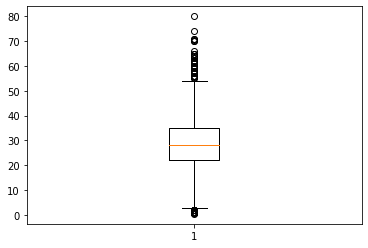

In [339]:
import matplotlib.pyplot as plt
plt.boxplot(df['Age'])

In [340]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df['Age']))
print(np.where(z>3))

(array([ 96, 116, 493, 630, 672, 745, 851], dtype=int64),)


In [341]:
df.drop('Cabin',axis=1,inplace=True)

In [342]:
df['Sex'].nunique()

2

In [343]:
#encoding
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [344]:
Embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [345]:
Embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [346]:
df.shape

(891, 11)

In [347]:
df.drop(['PassengerId','Name','Sex','Embarked','Ticket'],axis=1,inplace=True)

In [348]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [349]:
df=pd.concat([df,sex,Embarked],axis=1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,28.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


<AxesSubplot:>

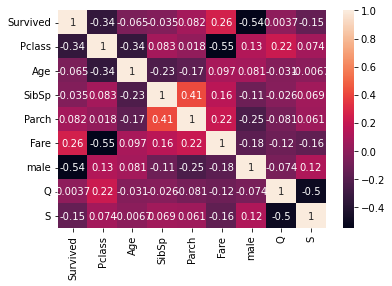

In [350]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [351]:
from sklearn.model_selection import train_test_split

In [352]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [353]:
x.shape

(891, 8)

In [354]:
y.shape

(891,)

In [355]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=50)

In [356]:
x_train.shape

(623, 8)

In [357]:
y_train.shape

(623,)

In [358]:
x_test.shape

(268, 8)

In [359]:
from sklearn.linear_model import LogisticRegression

In [360]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [361]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred))
print("confusion matrix: ",confusion_matrix(y_test,pred))
print("classification report: ",classification_report(y_test,pred))


accuracy score:  0.8097014925373134
confusion matrix:  [[144  18]
 [ 33  73]]
classification report:                precision    recall  f1-score   support

           0       0.81      0.89      0.85       162
           1       0.80      0.69      0.74       106

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



DecisionTreeClassifier

In [365]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred_dtc))

print("confusion matrix:",confusion_matrix(y_test,pred_dtc))
print("classification report:",classification_report(y_test,pred_dtc))



accuracy score:  0.7686567164179104
confusion matrix: [[138  24]
 [ 38  68]]
classification report:               precision    recall  f1-score   support

           0       0.78      0.85      0.82       162
           1       0.74      0.64      0.69       106

    accuracy                           0.77       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268



KNeighborsClassifier

In [374]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7,metric='euclidean')
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred_knn))


print("confusion matrix: ",confusion_matrix(y_test,pred_knn))
print("classification report: ",classification_report(y_test,pred_knn))



accuracy score:  0.7276119402985075
confusion matrix:  [[141  21]
 [ 52  54]]
classification report:                precision    recall  f1-score   support

           0       0.73      0.87      0.79       162
           1       0.72      0.51      0.60       106

    accuracy                           0.73       268
   macro avg       0.73      0.69      0.70       268
weighted avg       0.73      0.73      0.72       268



In [371]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_svm=svm.predict(x_test)

print("accuracy score:",accuracy_score(y_test,pred_svm))

accuracy score: 0.6529850746268657
